In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import numpy as np

In [2]:
img = plt.imread('./images/timestack.png')

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

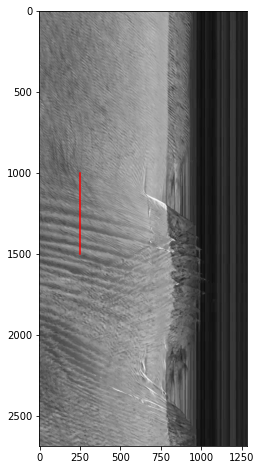

In [114]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow(gray, cmap='gray')
ax.plot([250, 250], [1000,1500], 'r-')


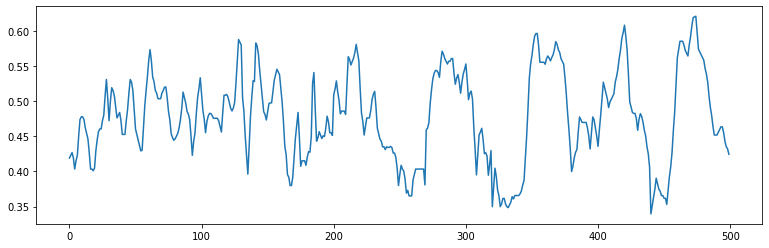

In [110]:
fig, ax = plt.subplots(figsize=(13, 4))
series = gray[1000:1500, 250]
ax.plot(series)


In [112]:

from ipywidgets import interactive, IntSlider


def f(column):
    series = gray[1000:1500, column]
    N = series.shape[0]
    T = 1.0 / 30
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    yf = fft(series)
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 0.2)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude [gray value]')

interactive_plot = interactive(f, column=IntSlider(value=250, min=200, max=1000, step=10, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=250, continuous_update=False, description='column', max=1000, min=200, s…

Text(0.5, 0, 'x pixel')

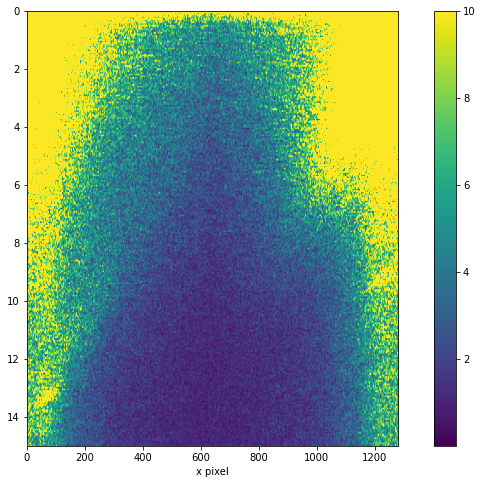

In [92]:

# n_samples
N = 500
T = 1/30.0
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import scipy

amplitude = np.abs(scipy.fft.fft2(gray[:N, :]))

fig, ax = plt.subplots(figsize=(13, 8))
im = ax.imshow(
    amplitude[:N//2,:], 
    vmax=10, 
    extent=[0, gray.shape[1], xf[-1], xf[0]], 
    aspect=100)
plt.colorbar(im, ax=ax)
ax.set_xlabel('x pixel')

In [90]:

ffts = []
N = series.shape[0]
T = 1.0 / 30
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
for column in range(300, 800):

    series = gray[0:500, column]
    yf = fft(series)
    ffts.append(yf[0:N//2, np.newaxis])
Yf = np.concatenate(ffts, axis=1)

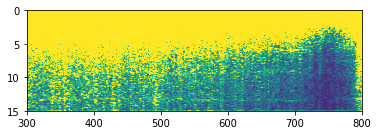

In [100]:
plt.imshow(np.abs(Yf), vmin=0, vmax=0.2, extent=[300, 800, xf[-1], xf[0]], aspect=10)